In [1]:
import pandas as pd
import numpy as np
import time
import normet
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig

In [2]:
df=pd.read_csv(r'data/AURN_data_download/Westminster/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'data/era5_data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [10]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [14]:
import h2o
from h2o.automl import H2OAutoML
# Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Convert data to H2O format
h2o.init()
h2o_data = h2o.H2OFrame(data)
# Train AutoML model
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], y='class', training_frame=h2o_data)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...


CalledProcessError: Command '['/usr/bin/java', '-version']' returned non-zero exit status 1.

In [13]:
def train_model(df, value='value', variables=None, model_config=None, seed=7654321, verbose=True):
    """
    Trains a machine learning model using the provided dataset and parameters.

    Parameters:
        df (pandas.DataFrame): Input DataFrame containing the dataset.
        value (str, optional): Name of the target variable. Default is 'value'.
        variables (list of str, optional): List of feature variables. Default is None.

    Keyword Parameters:
        model_config (dict, optional): Configuration dictionary for model training parameters.
        seed (int, optional): Random seed for reproducibility. Default is 7654321.
        verbose (bool, optional): If True, print progress messages. Default is True.

    Returns:
        object: Trained ML model object.

    Raises:
        ValueError: If `variables` contains duplicates or if any `variables` are not present in the DataFrame.
    """

    # Check for duplicate variables
    if len(set(variables)) != len(variables):
        raise ValueError("`variables` contains duplicate elements.")

    # Check if all variables are in the DataFrame
    if not all(var in df.columns for var in variables):
        raise ValueError("`variables` given are not within input data frame.")

    # Extract relevant data for training
    if 'set' in df.columns:
        df_train = df[df['set'] == 'training'][[value] + variables]
    else:
        df_train = df[[value] + variables]

    # Default configuration for model training
    default_model_config = {
        'max_models': 20,                     # Total running time in seconds
        'seed': seed,                             # List of ML learners
    }

    # Update default configuration with user-provided config
    if model_config is not None:
        default_model_config.update(model_config)

    # Initialize and train AutoML model
    h2o.init()
    if verbose:
        print(pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'), ": Training AutoML...")

    model = H2OAutoML(**default_model_config)
    model.train(x=variables, y='value', training_frame=df_train)

    if verbose:
        print(pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'), ": Best model is",
            model.best_estimator, "with best model parameters of", model.best_config)

    return model

automl=train_model(df1a,variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']);

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...


CalledProcessError: Command '['/usr/bin/java', '-version']' returned non-zero exit status 1.

In [8]:
automl=normet.train_model(df1a,variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']);

2024-07-03 13:00:44 : Training AutoML...


TypeError: XGBModel.fit() got an unexpected keyword argument 'callbacks'

In [9]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: xgboost
Best model parameters: {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [10]:
automl.best_result

{'pred_time': 4.33258431725921e-06,
 'wall_clock_time': 51.07887601852417,
 'metric_for_logging': {'pred_time': 4.33258431725921e-06},
 'val_loss': 3.113831945565272,
 'training_iteration': 1,
 'config': {'n_estimators': 80,
  'max_leaves': 179,
  'min_child_weight': 0.03469842703470486,
  'learning_rate': 0.09050333780681966,
  'subsample': 0.8788794424065157,
  'colsample_bylevel': 0.7372635897769984,
  'colsample_bytree': 0.9535003009271207,
  'reg_alpha': 0.09353166342028453,
  'reg_lambda': 3.6044671382295674},
 'config/n_estimators': 80,
 'config/max_leaves': 179,
 'config/min_child_weight': 0.03469842703470486,
 'config/learning_rate': 0.09050333780681966,
 'config/subsample': 0.8788794424065157,
 'config/colsample_bylevel': 0.7372635897769984,
 'config/colsample_bytree': 0.9535003009271207,
 'config/reg_alpha': 0.09353166342028453,
 'config/reg_lambda': 3.6044671382295674,
 'experiment_tag': 'exp',
 'time_total_s': 7.5784080028533936}

In [11]:
automl.feature_importances_

array([0.0512452 , 0.09356024, 0.05020848, 0.07993569, 0.0396647 ,
       0.21618505, 0.05815253, 0.02513707, 0.02636059, 0.03911485,
       0.02288253, 0.1130693 , 0.15781933, 0.02666452], dtype=float32)

In [12]:
automl.feature_names_in_

array(['weekday', 'u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc',
       'tp', 'rh2m', 'date_unix', 'day_julian', 'hour'], dtype='<U10')

In [13]:
mod_stats=(pd.concat([normet.modStats(df1a,automl,set='testing'),
                normet.modStats(df1a,automl,set='training'),
                normet.modStats(df1a.assign(set="all"),automl,set='all')]))

In [14]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [15]:
df1a

,rowid,ssrd,blh,tp,t2m,v10,d2m,sp,value,rh2m,tcc,u10,date,date_unix,day_julian,weekday,hour,set
0,0,-1.164153e-10,384.209053,0.000008,278.394725,1.545010,277.183465,102252.303312,58.1,91.884130,0.650958,-2.720528,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,-1.164153e-10,353.220263,0.000002,277.772899,1.282742,276.695430,102211.168636,43.2,92.715877,0.603699,-2.308789,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,-1.164153e-10,255.911846,0.000005,277.463419,0.758730,276.505662,102174.855967,43.0,93.485560,0.710378,-2.216471,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,-1.164153e-10,191.375560,0.000005,277.305813,0.509013,276.412816,102166.786485,42.8,93.906363,0.837765,-1.928623,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,-1.164153e-10,151.780210,0.000003,277.478941,0.607069,276.553051,102142.578039,36.8,93.696878,0.819103,-1.700043,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,-5.820766e-11,476.945688,0.000000,273.557442,-1.945195,272.197565,99902.506413,11.7,90.582979,0.918149,1.380939,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,-5.820766e-11,486.665851,0.000000,273.629146,-2.102732,272.171041,99947.625909,11.0,89.939908,0.839639,0.987925,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,-5.820766e-11,489.355002,0.000000,273.470592,-1.933668,272.087408,100000.215520,15.3,90.422188,0.739354,0.681543,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,-5.820766e-11,40.714872,0.000000,272.926062,-0.583816,272.235319,100042.844978,17.1,95.088677,0.643753,1.020793,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [16]:
start_time = time.time()
df_dew=normet.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=1000,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-03 12:31:21 : Normalising the dataset using the trained model in parallel.
2024-07-03 12:31:36 : Aggregating 1000 predictions...
Execution time: 15.27 seconds


In [17]:
start_time = time.time()
df_dew1=normet.normalise(df1a, automl, weather_df=df1.loc['2020-01-01':'2020-04-01',:],
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-03 12:31:37 : Normalising the dataset using the trained model in parallel.
2024-07-03 12:31:41 : Aggregating 300 predictions...
Execution time: 3.98 seconds


In [18]:
weather_df=df1.reset_index().iloc[0:100][['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m']]

In [19]:
weather_df.head()

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m
0,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130
1,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877
2,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560
3,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363
4,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878


In [20]:
start_time = time.time()
df_dew2=normet.normalise(df1a, automl, weather_df=weather_df,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-03 12:31:41 : Normalising the dataset using the trained model in parallel.
2024-07-03 12:31:44 : Aggregating 300 predictions...
Execution time: 3.30 seconds


<Axes: xlabel='date'>

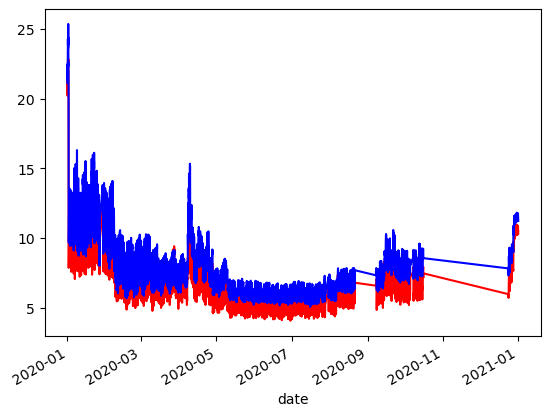

In [21]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')

In [22]:
model_config={
    'time_budget': 60,  # Total running time in seconds
    'metric': 'rmse', #
}

In [23]:
df1a.columns

Index(['rowid', 'ssrd', 'blh', 'tp', 't2m', 'v10', 'd2m', 'sp', 'value',
       'rh2m', 'tcc', 'u10', 'date', 'date_unix', 'day_julian', 'weekday',
       'hour', 'set'],
      dtype='object')

In [24]:
df_dew, mod_stats=normet.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-03 12:31:44 : Training AutoML...
2024-07-03 12:32:46 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-03 12:32:46 : Normalising the dataset using the trained model in parallel.
2024-07-03 12:32:48 : Aggregating 100 predictions...


In [25]:
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-03 12:32:48 : Normalising the dataset using the trained model in parallel.
2024-07-03 12:32:49 : Aggregating 100 predictions...


In [26]:
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],weather_df=weather_df,model_config=model_config,n_samples=100)

2024-07-03 12:32:49 : Normalising the dataset using the trained model in parallel.
2024-07-03 12:32:50 : Aggregating 100 predictions...


<Axes: xlabel='date'>

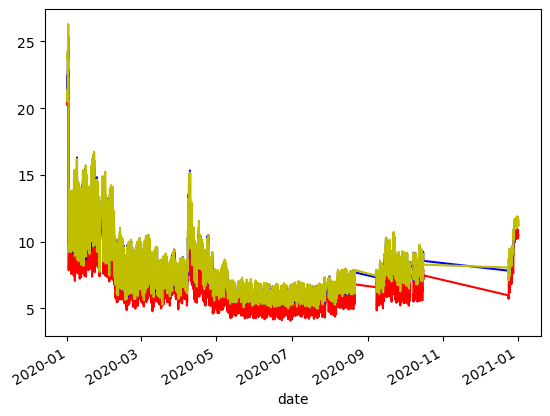

In [27]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')
df_dew['normalised'].plot(c='y')

In [28]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
1,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
2,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [29]:
df_dew, mod_stats=normet.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=100,n_models=5)

2024-07-03 12:33:54 : Progress: 20.00% (Model 1/5)... ETA: 4.21 minutes
2024-07-03 12:35:13 : Progress: 40.00% (Model 2/5)... ETA: 3.57 minutes
2024-07-03 12:36:20 : Progress: 60.00% (Model 3/5)... ETA: 2.33 minutes
2024-07-03 12:37:24 : Progress: 80.00% (Model 4/5)... ETA: 1.14 minutes
2024-07-03 12:38:37 : Progress: 100.00% (Model 5/5)... ETA: 0.00 seconds


In [30]:
#Resampling from given dataset
df_dew, mod_stats=normet.do_all(df1,value='PM2.5',weather_df=df1.loc['2020-01-01':'2020-04-01',:],feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=300)

2024-07-03 12:38:37 : Training AutoML...
2024-07-03 12:39:39 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-03 12:39:39 : Normalising the dataset using the trained model in parallel.
2024-07-03 12:39:43 : Aggregating 300 predictions...


In [31]:
df_dew.head()

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,22.036427
2020-01-01 01:00:00,43.2,20.604290
2020-01-01 02:00:00,43.0,20.541487
2020-01-01 03:00:00,42.8,20.982031
2020-01-01 04:00:00,36.8,20.209471


# Time series decomposition

In [32]:
df_dewca, mod_stats=normet.decom_emi(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random', fraction=0.75, n_samples=300)

2024-07-03 12:39:43 : Training AutoML...
2024-07-03 12:40:44 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-03 12:40:44 : Subtracting base...
2024-07-03 12:40:48 : Subtracting date_unix... ETA: 14.30 seconds
2024-07-03 12:40:51 : Subtracting day_julian... ETA: 10.35 seconds
2024-07-03 12:40:55 : Subtracting weekday... ETA: 6.96 seconds
2024-07-03 12:40:58 : Subtracting hour... ETA: 3.47 seconds


In [33]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.818041,20.771057,1.522188,0.589029,-0.682137,22.864885,0.664746
2020-01-01 01:00:00,43.2,9.692105,21.108507,1.625845,0.505590,-0.538025,23.240728,0.538811
2020-01-01 02:00:00,43.0,8.911392,21.242676,1.750687,0.683084,-0.605843,22.828701,-0.241902
2020-01-01 03:00:00,42.8,8.811673,21.473623,1.746353,0.573212,-0.785749,22.665817,-0.341621
2020-01-01 04:00:00,36.8,8.689767,21.652887,1.853514,0.659945,-0.764317,22.938501,-0.463528
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.585531,10.737784,1.087622,0.078158,0.046932,11.382733,-0.567763
2020-12-31 20:00:00,11.0,10.310694,9.930680,0.563858,0.074872,-0.047103,11.679707,1.157399
2020-12-31 21:00:00,15.3,8.988753,10.922729,1.009412,0.065480,-0.096726,11.736354,-0.164541


In [34]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-03 12:41:02 : Subtracting base...
2024-07-03 12:41:05 : Subtracting date_unix... ETA: 14.61 seconds
2024-07-03 12:41:09 : Subtracting day_julian... ETA: 10.69 seconds
2024-07-03 12:41:12 : Subtracting weekday... ETA: 7.14 seconds
2024-07-03 12:41:16 : Subtracting hour... ETA: 3.53 seconds


In [35]:
df_dewcb, mod_stats=normet.decom_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-07-03 12:41:19 : Training AutoML...
2024-07-03 12:42:21 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-07-03 12:42:21 : Subtracting deweathered...
2024-07-03 12:42:25 : Subtracting blh... ETA: 37.32 seconds
2024-07-03 12:42:28 : Subtracting u10... ETA: 32.10 seconds
2024-07-03 12:42:31 : Subtracting d2m... ETA: 27.85 seconds
2024-07-03 12:42:35 : Subtracting sp... ETA: 24.05 seconds
2024-07-03 12:42:38 : Subtracting v10... ETA: 20.71 seconds
2024-07-03 12:42:41 : Subtracting t2m... ETA: 16.92 seconds
2024-07-03 12:42:44 : Subtracting tp... ETA: 13.32 seconds
2024-07-03 12:42:47 : Subtracting tcc... ETA: 9.69 seconds
2024-07-03 12:42:49 : Subtracting ssrd... ETA: 6.30 second

In [36]:
df_dewcb, mod_stats=normet.decom_met(df1a, model=automl, feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-07-03 12:42:54 : Subtracting deweathered...
2024-07-03 12:42:58 : Subtracting blh... ETA: 37.11 seconds
2024-07-03 12:43:02 : Subtracting u10... ETA: 31.80 seconds
2024-07-03 12:43:05 : Subtracting d2m... ETA: 27.83 seconds
2024-07-03 12:43:08 : Subtracting sp... ETA: 23.85 seconds
2024-07-03 12:43:11 : Subtracting v10... ETA: 19.64 seconds
2024-07-03 12:43:14 : Subtracting t2m... ETA: 16.05 seconds
2024-07-03 12:43:16 : Subtracting tp... ETA: 12.43 seconds
2024-07-03 12:43:19 : Subtracting tcc... ETA: 9.19 seconds
2024-07-03 12:43:21 : Subtracting ssrd... ETA: 5.97 seconds
2024-07-03 12:43:24 : Subtracting rh2m... ETA: 2.91 seconds


In [37]:
df_dewcb

,observed,deweathered,blh,u10,d2m,sp,v10,t2m,tp,tcc,ssrd,rh2m,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,22.864885,2.854317,15.630064,13.585722,2.749363,6.028515,5.311699,2.626835,1.852100,0.492111,0.291279,9.400610
2020-01-01 01:00:00,43.2,23.240728,1.160046,10.406569,10.066999,3.538940,5.699253,4.798836,2.979919,2.052608,1.126270,-0.196972,-0.640710
2020-01-01 02:00:00,43.0,22.828701,0.254179,6.895737,8.093370,3.201305,4.187462,4.713776,3.268955,2.710617,2.816219,1.285332,1.364532
2020-01-01 03:00:00,42.8,22.665817,-0.718531,5.525810,8.806564,3.522533,3.138090,4.667519,3.241398,2.791050,3.407257,1.633690,1.993581
2020-01-01 04:00:00,36.8,22.938501,-0.481640,1.371229,4.505474,3.842245,2.207918,3.431309,2.877602,1.892057,2.999714,2.141823,1.182835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,11.382733,-0.436875,-0.410500,0.122235,0.354285,0.350950,0.891096,0.772741,-0.003299,0.025797,-0.241484,-0.272833
2020-12-31 20:00:00,11.0,11.679707,-0.511590,-0.475010,-0.063734,0.179852,0.303094,0.786525,0.787106,-0.405293,-0.419207,-0.193840,-0.571940
2020-12-31 21:00:00,15.3,11.736354,-0.466662,-0.611574,-0.141844,0.206223,0.316869,0.831674,0.789627,-0.466408,-0.438252,-0.049072,3.652803


In [38]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-03 12:43:26 : Subtracting base...
2024-07-03 12:43:30 : Subtracting date_unix... ETA: 14.78 seconds
2024-07-03 12:43:34 : Subtracting day_julian... ETA: 10.93 seconds
2024-07-03 12:43:37 : Subtracting weekday... ETA: 7.13 seconds
2024-07-03 12:43:40 : Subtracting hour... ETA: 3.51 seconds


In [39]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.818041,20.771057,1.522188,0.589029,-0.682137,22.864885,0.664746
2020-01-01 01:00:00,43.2,9.692105,21.108507,1.625845,0.505590,-0.538025,23.240728,0.538811
2020-01-01 02:00:00,43.0,8.911392,21.242676,1.750687,0.683084,-0.605843,22.828701,-0.241902
2020-01-01 03:00:00,42.8,8.811673,21.473623,1.746353,0.573212,-0.785749,22.665817,-0.341621
2020-01-01 04:00:00,36.8,8.689767,21.652887,1.853514,0.659945,-0.764317,22.938501,-0.463528
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.585531,10.737784,1.087622,0.078158,0.046932,11.382733,-0.567763
2020-12-31 20:00:00,11.0,10.310694,9.930680,0.563858,0.074872,-0.047103,11.679707,1.157399
2020-12-31 21:00:00,15.3,8.988753,10.922729,1.009412,0.065480,-0.096726,11.736354,-0.164541


# Rolling weather normalisation

In [40]:
df_dewc1, mod_stats=normet.rolling_dew(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-07-03 12:43:45 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-03 12:43:49 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 11.79 seconds
2024-07-03 12:43:52 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 7.33 seconds
2024-07-03 12:43:56 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 3.36 seconds


In [41]:
df_dewc1.head()

,observed,rolling_0,rolling_1,rolling_2,rolling_3,rolling_4,rolling_5,rolling_6,rolling_7,rolling_8,...,rolling_29,rolling_30,rolling_31,rolling_32,rolling_33,rolling_34,rolling_35,rolling_36,rolling_37,rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,16.387463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,17.699984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,16.876064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,17.117424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,17.708944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

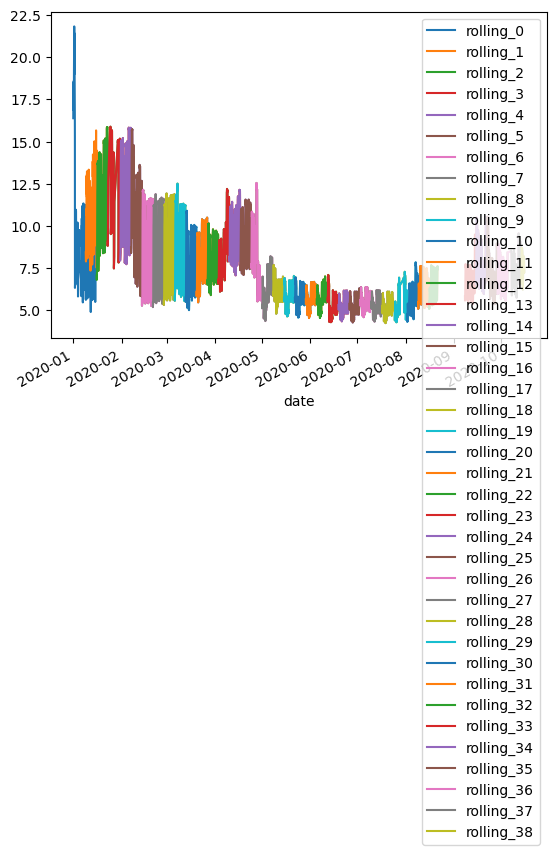

In [42]:
df_dewc1.iloc[:,1:].plot()

In [43]:
df_dewc2, mod_stats=normet.rolling_met(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321)

2024-07-03 12:44:01 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-03 12:44:05 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 10.26 seconds
2024-07-03 12:44:08 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 6.72 seconds
2024-07-03 12:44:12 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 3.12 seconds


In [44]:
df_dewc2.head()

,observed,normalised,emi_mean_14,emi_std_14,met_short,met_season
date,,,,,,
2020-01-01 00:00:00,58.1,23.359095,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,23.346687,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,23.182106,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,22.247671,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,22.552515,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

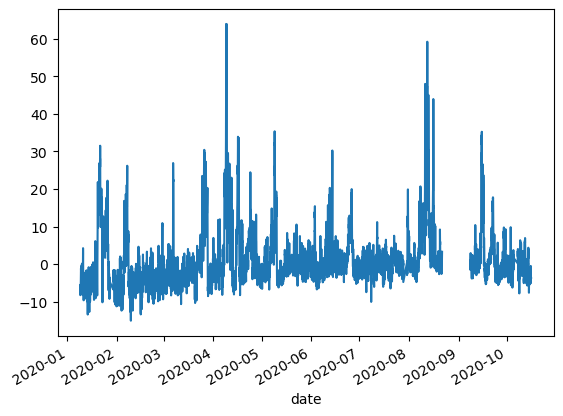

In [45]:
df_dewc2['met_short'].plot()

<Axes: xlabel='date'>

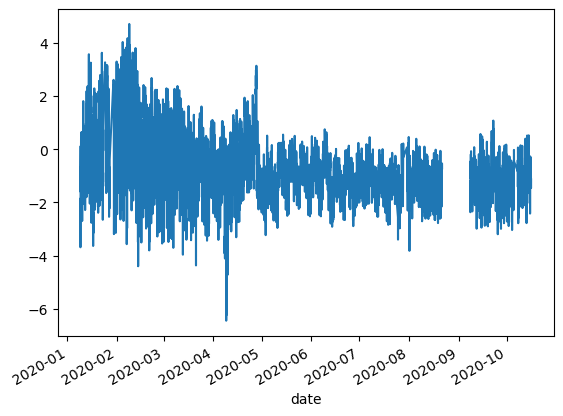

In [46]:
df_dewc2['met_season'].plot()

# Partial Dependence Plots

In [47]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [48]:
df1a

,rowid,ssrd,blh,tp,t2m,v10,d2m,sp,value,rh2m,tcc,u10,date,date_unix,day_julian,weekday,hour,set
0,0,-1.164153e-10,384.209053,0.000008,278.394725,1.545010,277.183465,102252.303312,58.1,91.884130,0.650958,-2.720528,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,-1.164153e-10,353.220263,0.000002,277.772899,1.282742,276.695430,102211.168636,43.2,92.715877,0.603699,-2.308789,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,-1.164153e-10,255.911846,0.000005,277.463419,0.758730,276.505662,102174.855967,43.0,93.485560,0.710378,-2.216471,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,-1.164153e-10,191.375560,0.000005,277.305813,0.509013,276.412816,102166.786485,42.8,93.906363,0.837765,-1.928623,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,-1.164153e-10,151.780210,0.000003,277.478941,0.607069,276.553051,102142.578039,36.8,93.696878,0.819103,-1.700043,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,-5.820766e-11,476.945688,0.000000,273.557442,-1.945195,272.197565,99902.506413,11.7,90.582979,0.918149,1.380939,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,-5.820766e-11,486.665851,0.000000,273.629146,-2.102732,272.171041,99947.625909,11.0,89.939908,0.839639,0.987925,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,-5.820766e-11,489.355002,0.000000,273.470592,-1.933668,272.087408,100000.215520,15.3,90.422188,0.739354,0.681543,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,-5.820766e-11,40.714872,0.000000,272.926062,-0.583816,272.235319,100042.844978,17.1,95.088677,0.643753,1.020793,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [49]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=normet.pdp_all(automl,df1a,feature_names=all_features)

In [50]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,u10,-4.354032,10.963994,7.261466
1,u10,-4.242993,11.043289,7.309947
2,u10,-4.131954,11.042447,7.333392
3,u10,-4.020915,11.031183,7.338155
4,u10,-3.909875,11.040386,7.363017
...,...,...,...,...
1226,hour,19.000000,9.639515,7.460504
1227,hour,20.000000,9.578510,7.448645
1228,hour,21.000000,9.388046,7.372877
1229,hour,22.000000,9.182877,7.346088
